In [1]:
import xarray as xr
from matplotlib import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import pandas as pd
from scipy.spatial import cKDTree

In [2]:
d = xr.open_dataset('./../Data/Fields/friction_coefficient.nc')
d['friction_c']
d2 = xr.open_dataset('./../Data/Fields/mask_grounded.nc')
d2['mask_grounded']
d3 = xr.open_dataset('./../Data/Fields/basin.nc')
d4 = xr.open_dataset('./../Data/Fields/bed.nc')
d5 = xr.open_dataset('./../Data/Fields/thickness.nc')
d6 = xr.open_dataset('./../Data/Fields/geothermalflux.nc')
d7 = xr.open_dataset('./../Data/Fields/bedtype.nc')


16

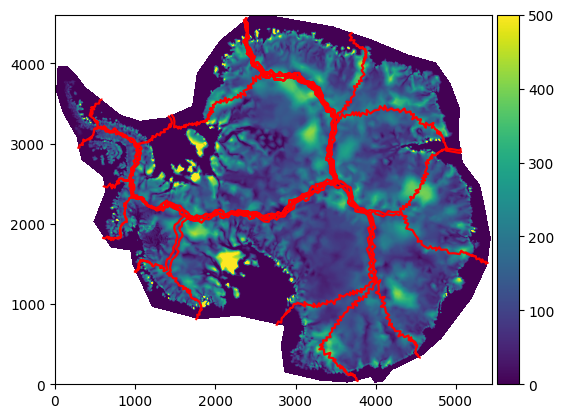

In [73]:
levels = len(np.unique(d3['basin'].values)) -1

f,ax = plt.subplots(1,1)
im =ax.imshow(d['friction_c'].values,vmin=0,vmax=500,origin ='lower')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
ax.contour(d3.x,d3.y,d3['basin'].values,levels =levels,colors = 'red')


f.colorbar(im, cax=cax, orientation='vertical')

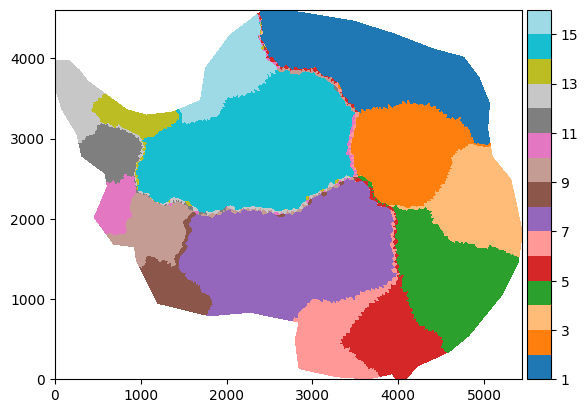

In [74]:
f,ax = plt.subplots(1,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im =ax.contourf(d3.x,d3.y,d3['basin'].values,levels =16,cmap ='tab20')


f.colorbar(im, cax=cax, orientation='vertical')

In [75]:
m_fl = d2['mask_grounded'].values <0

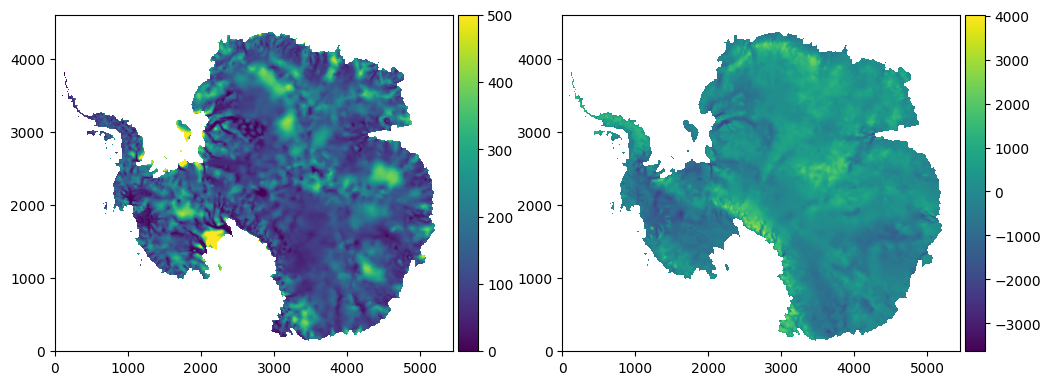

In [76]:

f,ax = plt.subplots(1,2,figsize = (12,12))
gr=d['friction_c'].values.copy()
gr[m_fl] = np.nan
im =ax[0].imshow(gr,origin ='lower',vmin=0,vmax=500,)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
bd = d4['bed'].values.copy()
bd[m_fl] = np.nan
im2 =ax[1].imshow(bd,origin ='lower')
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)

f.colorbar(im2, cax=cax2, orientation='vertical')
f.colorbar(im, cax=cax, orientation='vertical')

### let look for areas below sea level only....

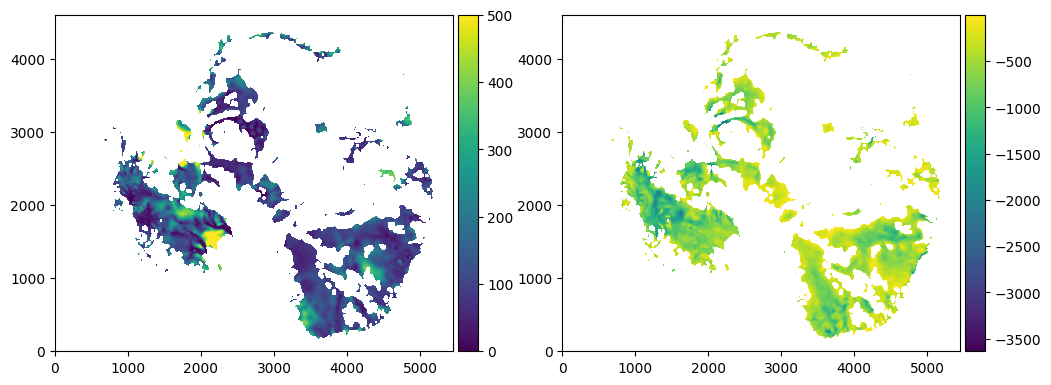

In [77]:
m_negbed = d4['bed'].values <0

f,ax = plt.subplots(1,2,figsize = (12,12))

gr[~m_negbed] = np.nan
im =ax[0].imshow(gr,origin ='lower',vmin=0,vmax=500,)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)

bd[~m_negbed ] = np.nan
im2 =ax[1].imshow(bd,origin ='lower')
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)

f.colorbar(im2, cax=cax2, orientation='vertical')
f.colorbar(im, cax=cax, orientation='vertical')

## is there a dpeth dependence?

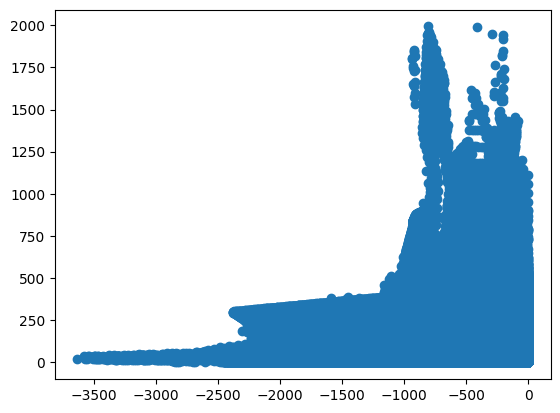

In [253]:
f,ax = plt.subplots(1,1)
ax.scatter(bd,gr)

## Basin wide/

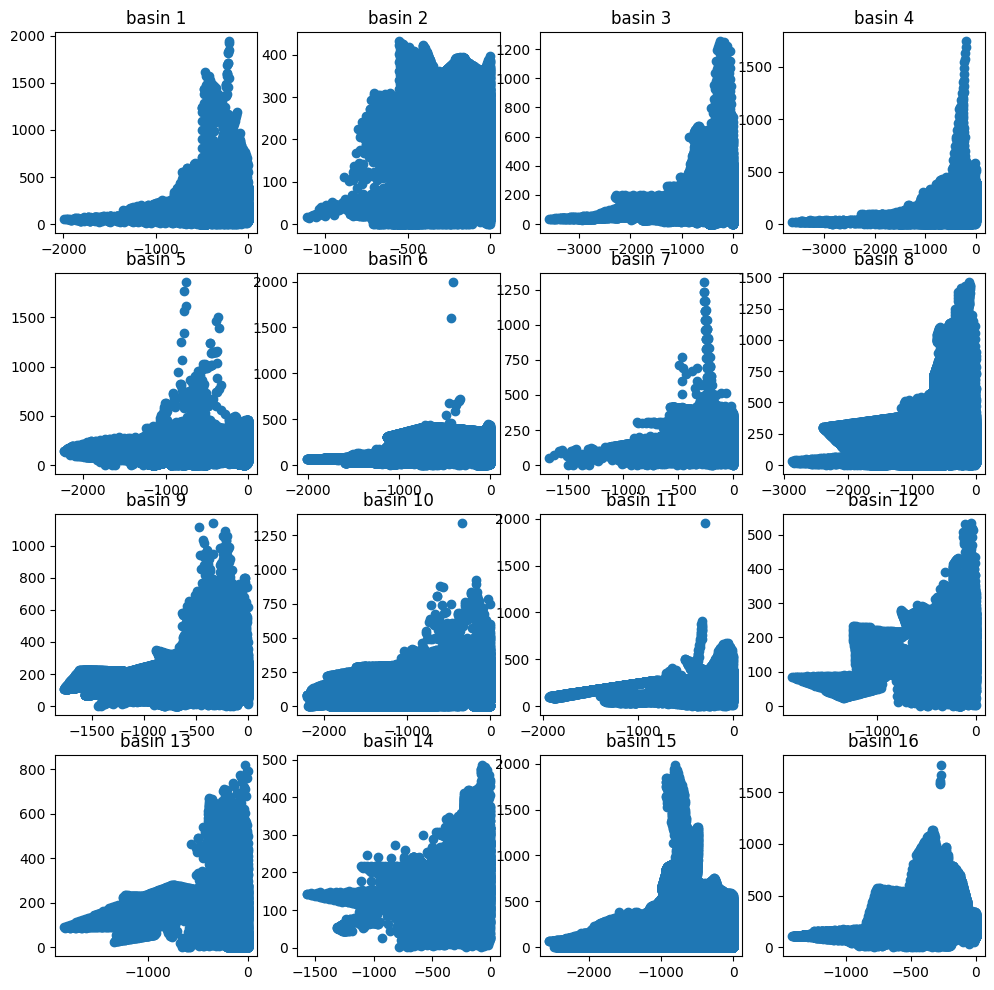

In [80]:
f, ax = plt.subplots(4,4,figsize =(12,12))
for b in range(16):
    i =b//4
    j = b%4
    b =b+1
    m_b = d3['basin'].values ==float(b) 
    ax[i,j].scatter(bd[ m_b],gr[ m_b])
  

    ax[i,j].set_title('basin '+str(b))

## Gradient

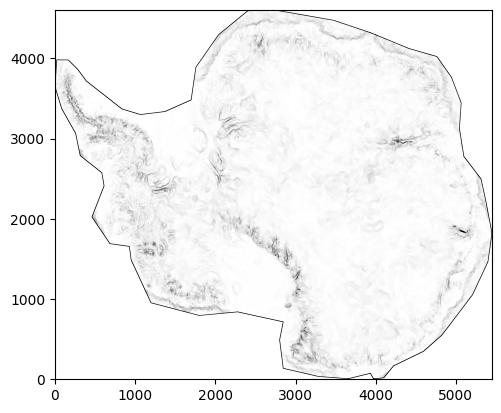

In [252]:
plt.imshow(slopes_angle, cmap=plt.cm.gist_yarg,origin = 'lower',vmin = 0,vmax = 20)

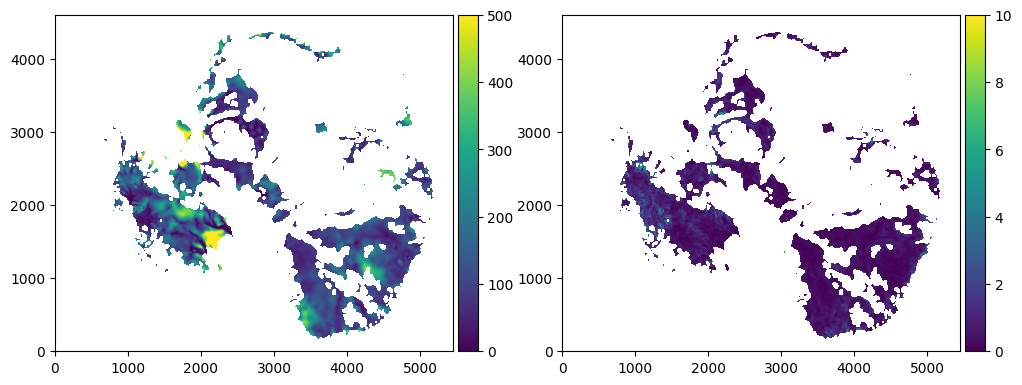

In [256]:
m_negbed = d4['bed'].values <0

f,ax = plt.subplots(1,2,figsize = (12,12))
slopes_angle_ana = slopes_angle.copy()
slopes_angle_ana[m_fl] = np.nan
slopes_angle_ana[~m_negbed] = np.nan

im =ax[0].imshow(gr,origin ='lower',vmin=0,vmax=500,)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)


im2 =ax[1].imshow(slopes_angle_ana,origin ='lower',vmin =0, vmax=10)
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)

f.colorbar(im2, cax=cax2, orientation='vertical')
f.colorbar(im, cax=cax, orientation='vertical')

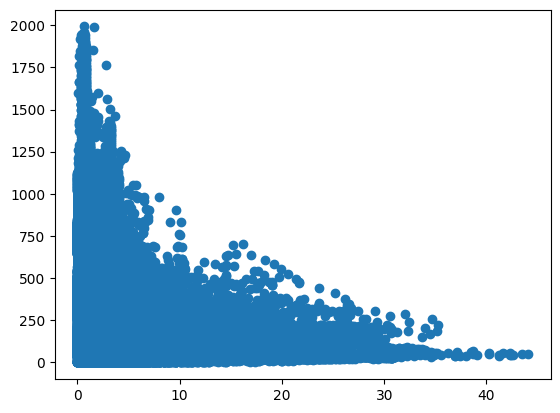

In [257]:
f,ax = plt.subplots(1,1)
ax.scatter(slopes_angle_ana,gr)

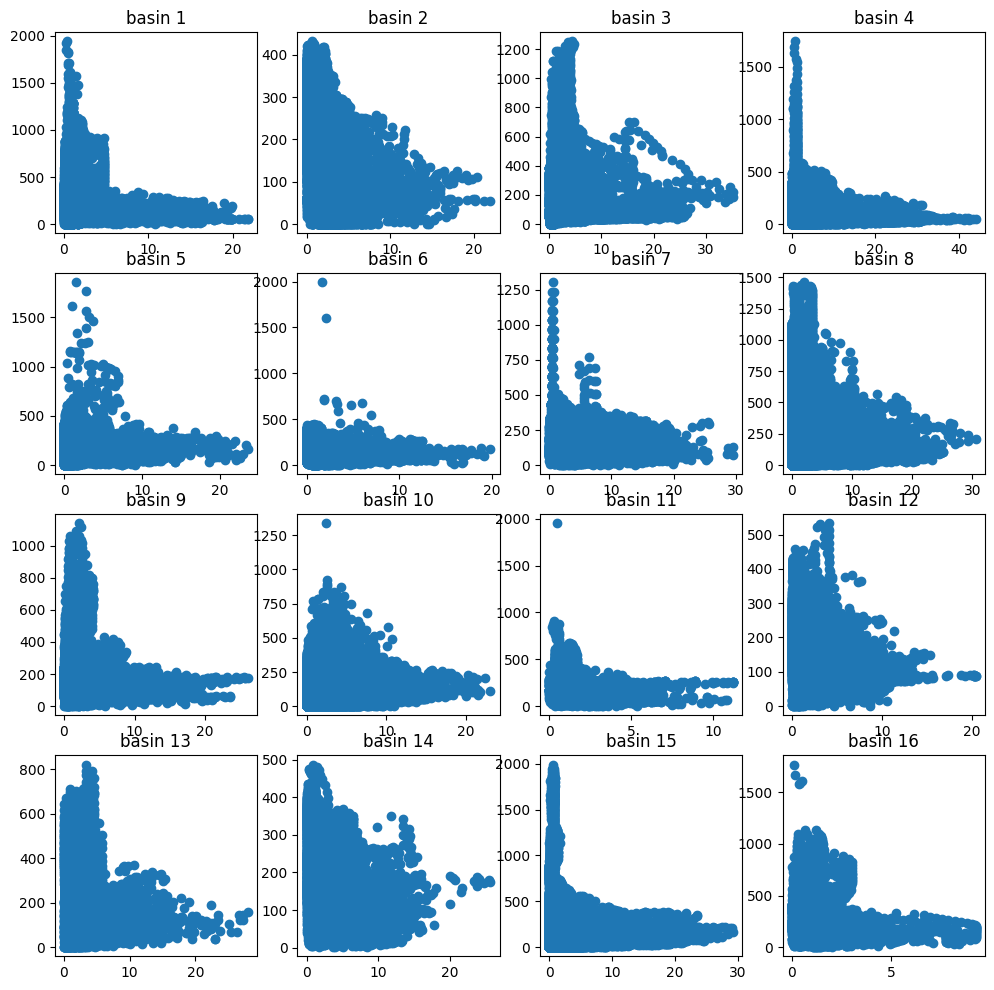

In [258]:
f, ax = plt.subplots(4,4,figsize =(12,12))
for b in range(16):
    i =b//4
    j = b%4
    b =b+1
    m_b = d3['basin'].values ==float(b) 
    ax[i,j].scatter(slopes_angle_ana[ m_b],gr[ m_b])
  

    ax[i,j].set_title('basin '+str(b))

## geothermal flux

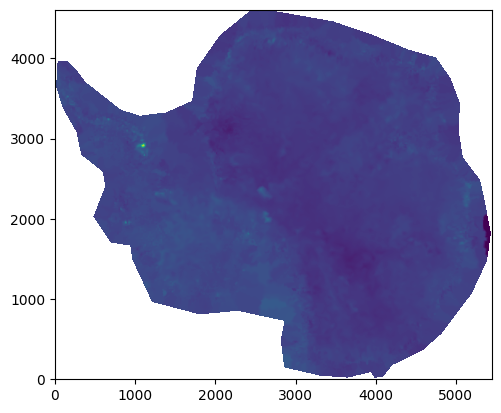

In [269]:
plt.imshow(d6['geothermalflux'].values,origin = 'lower')

In [270]:
gth = d6['geothermalflux'].values.copy()
gth[m_fl] = np.nan
gth[~m_negbed] = np.nan

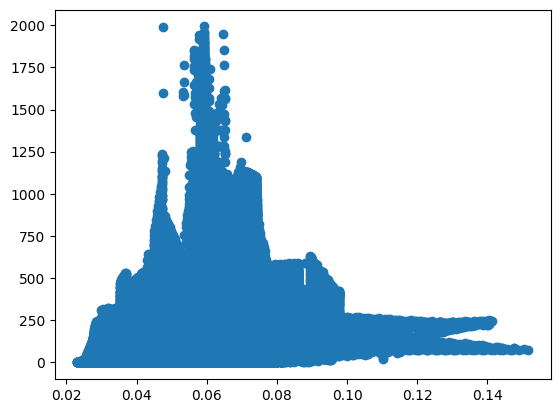

In [271]:
f,ax = plt.subplots(1,1)
ax.scatter(gth,gr)

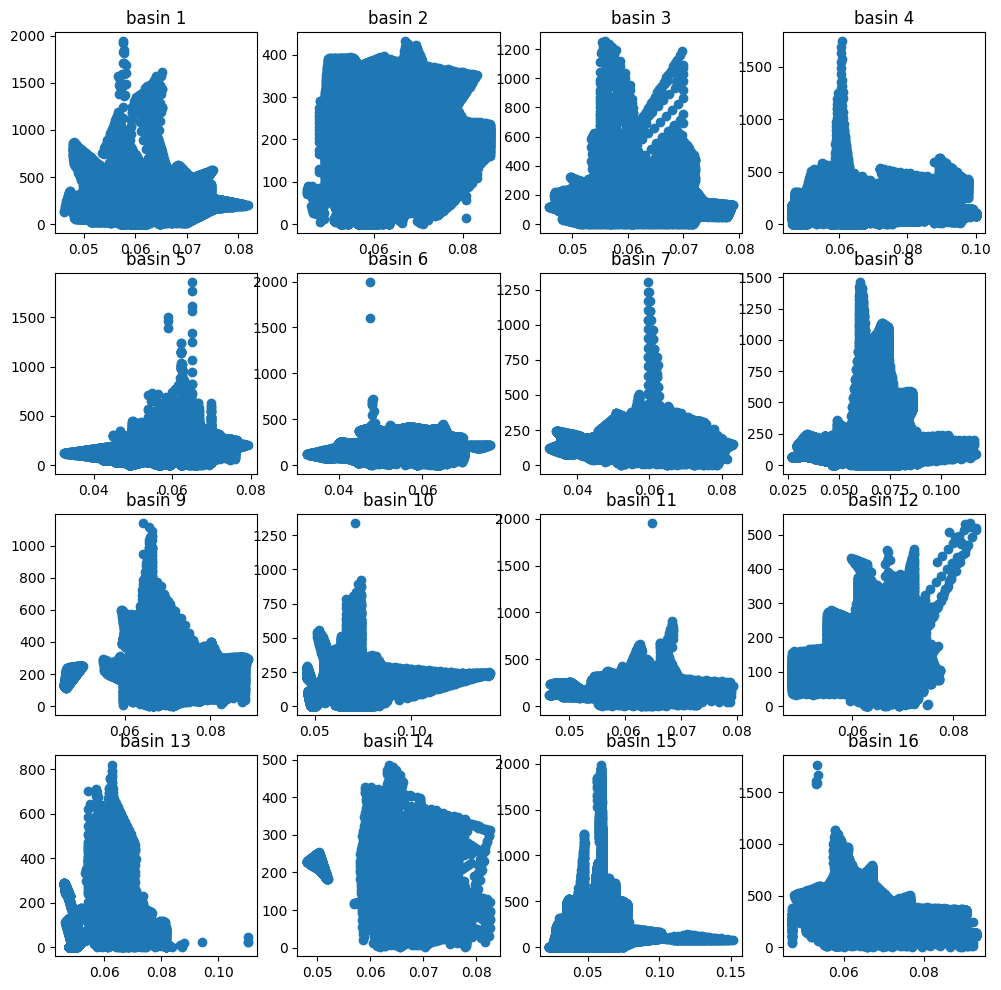

In [272]:
f, ax = plt.subplots(4,4,figsize =(12,12))
for b in range(16):
    i =b//4
    j = b%4
    b =b+1
    m_b = d3['basin'].values ==float(b) 
    ax[i,j].scatter(gth[ m_b],gr[ m_b])
  

    ax[i,j].set_title('basin '+str(b))

In [273]:
dic ={}
dic['coefficient']= gr.flatten()
dic['bed']=bd.flatten()
dic['slope']=slopes_angle_ana.flatten()
dic['gth']=gth.flatten()

ds = pd.DataFrame.from_dict(dic)
ds =ds.dropna()
ds.head()

,coefficient,bed,slope,gth
532119,103.937202,-92.444467,1.219111,0.051968
537563,89.052756,-84.832357,1.235902,0.051611
537564,94.603824,-81.410195,1.235902,0.051647
537565,100.154892,-77.988033,1.235902,0.051683
537566,105.705961,-74.565871,1.235902,0.051720


In [274]:
y = ds['coefficient']
X = ds[['bed', 'slope','gth']]

In [275]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
'mean_absolute_error : ', mean_absolute_error(y_test, predictions))


mean_squared_error :  7711.510421161907
mean_absolute_error :  62.030891175258844


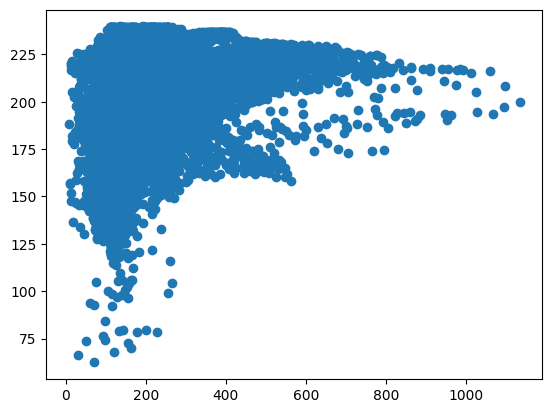

In [276]:
f,ax = plt.subplots(1,1)
ax.scatter(y_test.values, predictions)

In [1]:
gr[ m_b]

NameError: name 'gr' is not defined

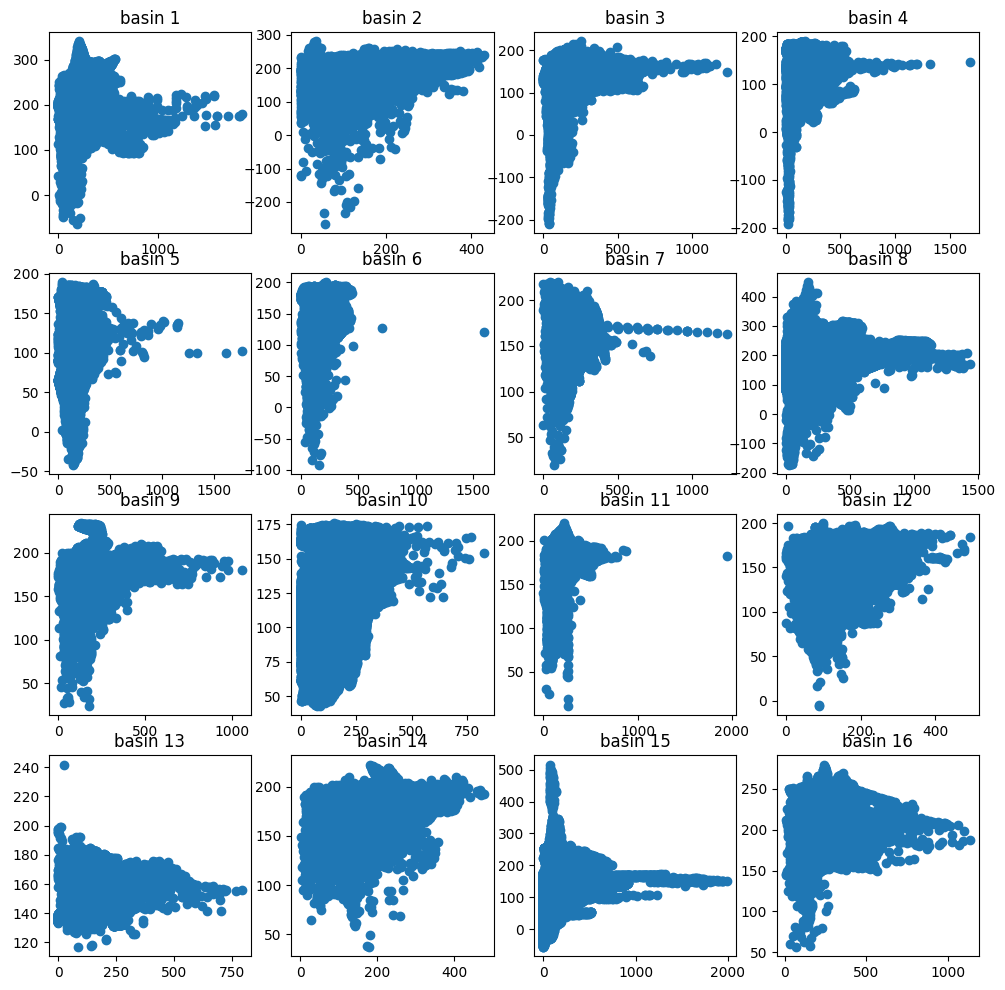

In [277]:
f, ax = plt.subplots(4,4,figsize =(12,12))
for b in range(16):
    i =b//4
    j = b%4
    b =b+1
    m_b = d3['basin'].values ==float(b) 
    dic ={}
    dic['coefficient']= gr[ m_b]
    dic['bed']=bd[ m_b]
    dic['slope']=slopes_angle_ana[ m_b]
    dic['gth']=gth[ m_b]
    
    ds = pd.DataFrame.from_dict(dic)
    ds =ds.dropna()
    y = ds['coefficient']
    X = ds[['bed', 'slope','gth']]

    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    ax[i,j].scatter(y_test.values, predictions)

    ax[i,j].set_title('basin '+str(b))

### Different bed type

In [293]:
bedtype = d7['bedtype'].values.copy()
bedtype[m_fl] = np.nan
bedtype[~m_negbed] = np.nan
bedtype[ bedtype <-4] = np.nan
bedtype = bedtype.astype('int')
bedtype_values = np.unique(bedtype)

/var/folders/ph/m61jd3r90t190p6qvbps3yqct2hr65/T/ipykernel_87756/1009626218.py:5: RuntimeWarning: invalid value encountered in cast
  bedtype = bedtype.astype('int')


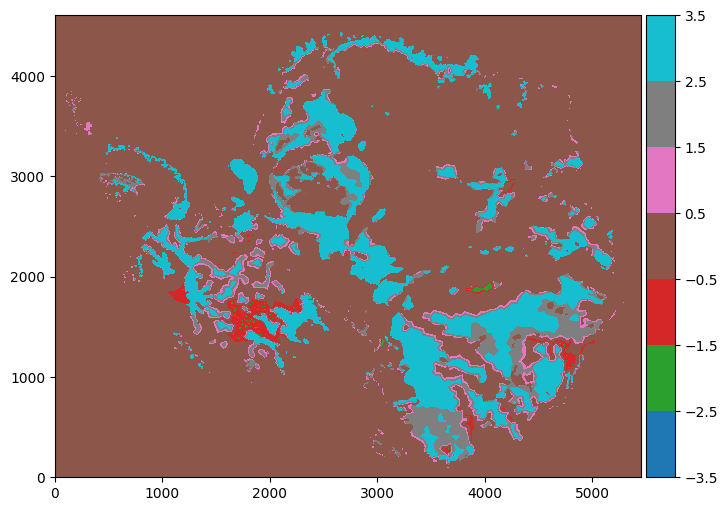

In [306]:
f,ax = plt.subplots(1,1,figsize = (8,6))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
levels = list(bedtype_values  -0.5)
levels.append(bedtype_values [-1]+0.5)

im =ax.contourf( d7.x,d7.y,bedtype,levels =levels,cmap ='tab10')
# im =ax.imshow(geotiff_ds['from'])
cbar1=f.colorbar(im, cax=cax, orientation='vertical')

In [301]:
bedtype_values

array([-3, -2, -1,  0,  1,  2,  3])

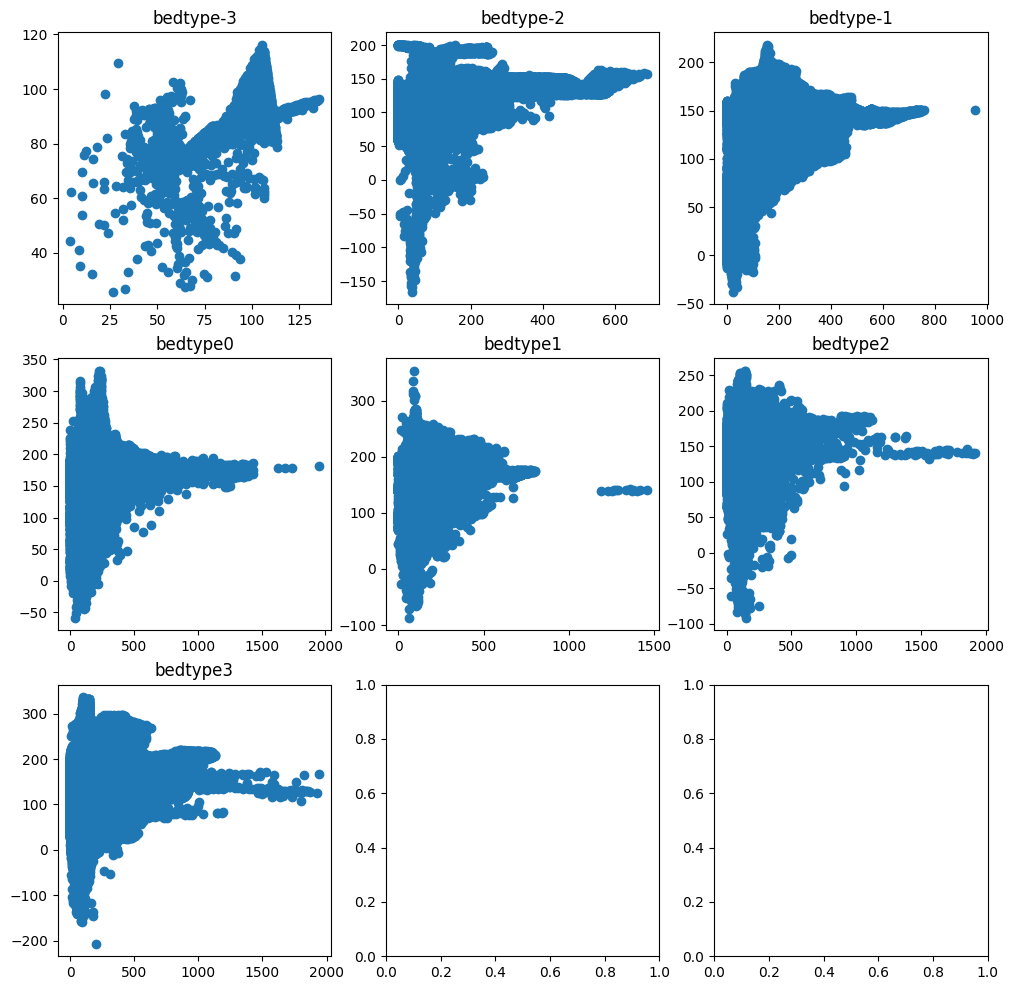

In [304]:
f, ax = plt.subplots(3,3,figsize =(12,12))
for b,val in enumerate(bedtype_values):
    i =b//3
    j = b%3
    b =b+1
    m_b = bedtype ==val
    dic ={}
    dic['coefficient']= gr[ m_b]
    dic['bed']=bd[ m_b]
    dic['slope']=slopes_angle_ana[ m_b]
    dic['gth']=gth[ m_b]
    
    ds = pd.DataFrame.from_dict(dic)
    ds =ds.dropna()
    y = ds['coefficient']
    X = ds[['bed', 'slope','gth']]

    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    ax[i,j].scatter(y_test.values, predictions)
    ax[i,j].set_title('bedtype'+str(val))


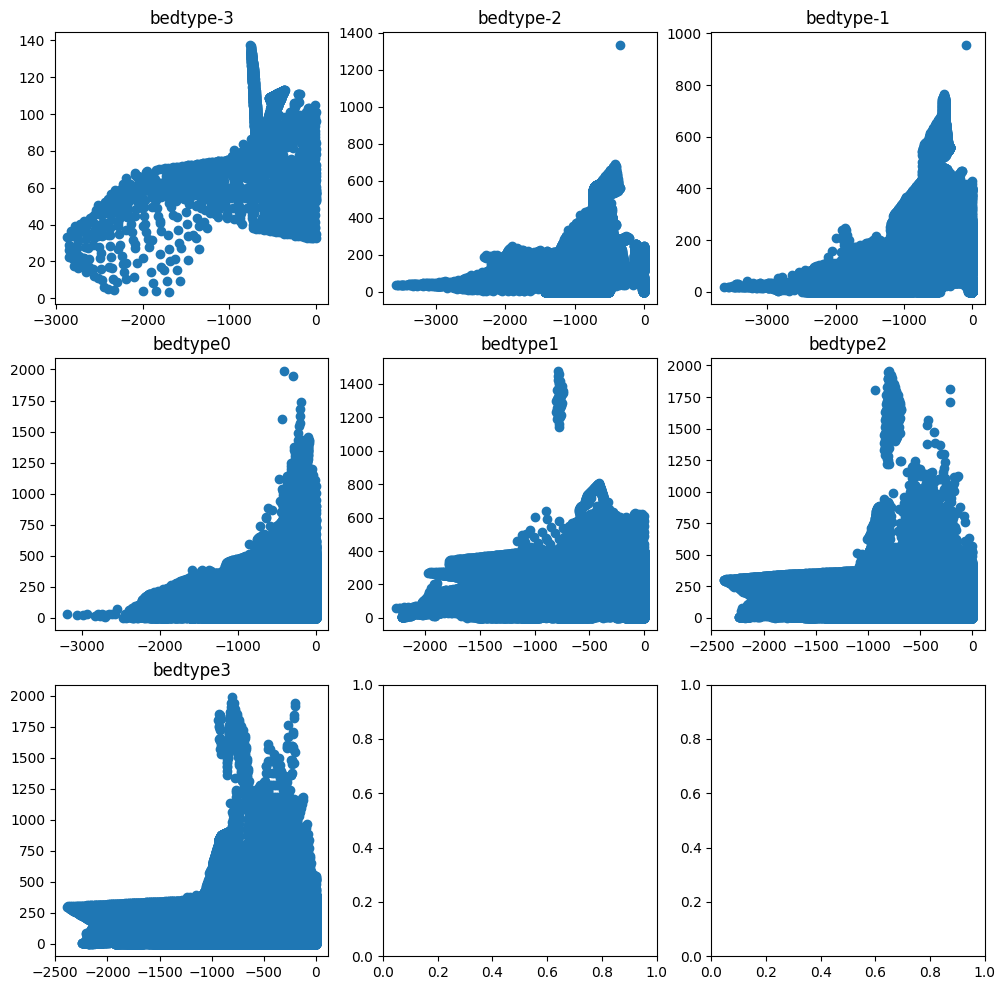

In [307]:
f, ax = plt.subplots(3,3,figsize =(12,12))
for b,val in enumerate(bedtype_values):
    i =b//3
    j = b%3
    b =b+1
    m_b = bedtype ==val
    dic ={}
    dic['coefficient']= gr[ m_b]
    dic['bed']=bd[ m_b]
    dic['slope']=slopes_angle_ana[ m_b]
    dic['gth']=gth[ m_b]
    
    ds = pd.DataFrame.from_dict(dic)
    ds =ds.dropna()
#     y = ds['coefficient']
#     X = ds[['bed', 'slope','gth']]

    
#     X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=101)
#     model = LinearRegression()
#     model.fit(X_train,y_train)
#     predictions = model.predict(X_test)
    ax[i,j].scatter(bd[ m_b],gr[ m_b])
    ax[i,j].set_title('bedtype'+str(val))


### check if how strong the points depend on nearest neighbour interpolation

In [508]:
# # rom tqdm import trange
# # d4 = xr.open_dataset('./../Data/Fields/bed.nc')
# bed = d4['bed'].values.copy()
# mnan = np.isnan(bed)
# bed[mnan]= -9999.0

"""

    :param XYZ_file: XYZ file in the following format: x,y,z (inlcuding headers)
    :param min: color bar minimum range.
    :param max: color bar maximum range.
    :param figsize: figure size.
    :param kwargs:
           plot: to plot a gradient map. Default is True.
    :return: returns an array with the shape of the grid with the computed slopes


    The algorithm calculates the gradient using a first-order forward or backward difference on the corner points, first
    order central differences at the boarder points, and a 3x3 moving window for every cell with 8 surrounding cells (in
    the middle of the grid) using a third-order finite difference weighted by reciprocal of squared distance

    Assumed 3x3 window:

                        -------------------------
                        |   a   |   b   |   c   |
                        -------------------------
                        |   d   |   e   |   f   |
                        -------------------------
                        |   g   |   h   |   i   |
                        -------------------------


    """

def window3x3_a(arr, shape=(3, 3)):
    x,y = np.shape(arr)
    
    xmin_a=np.zeros(x).astype('i')
    xmax_a=np.zeros(x).astype('i')
    ymin_a=np.zeros(y).astype('i')
    ymax_a=np.zeros(y).astype('i')
    
    
    
   
    
    r_win = np.floor(shape[0] / 2).astype(int)
    c_win = np.floor(shape[1] / 2).astype(int)
    for i in range(x):
        xmin = max(0, i - r_win)
        xmax = min(x, i + r_win + 1)
        xmin_a[i]=xmin
        xmax_a[i]=xmax
    
        for j in range(y):
            ymin = max(0, j - c_win)
            ymax = min(y, j + c_win + 1)
            ymin_a[j]=ymin
            ymax_a[j]=ymax
       
    return(xmin_a,xmax_a,ymin_a,ymax_a)
            

def nnmean(mat):
    '''mat =matrix has to be ar leest 3 x 3'''
#     x = d3.x.values.copy()
#     y = d3.y.values.copy()
    ny,nx = mat.shape
   
    # gen = window3x3(bd)
    # windows_3x3 = np.asarray(list(gen))
    xmin_a,xmax_a,ymin_a,ymax_a = window3x3_a(mat)

    dzdx = np.empty((ny, nx)) #matrix for nanmean
  
    loc_string = np.empty((ny, nx), dtype="S25")
    for ax_y in range(ny):
            for ax_x in range(nx):
                windows = mat[xmin_a[ax_y]:xmax_a[ax_y],ymin_a[ax_x]:ymax_a[ax_x]]

                # corner points
                if ax_x == 0 and ax_y == 0:  # top left corner
                   
                    dzdx[ax_y, ax_x] = np.nanmean([windows[0][1] ,windows[1][0] , windows[1][1]]) 

                    
                    loc_string[ax_y, ax_x] = 'top left corner'

                elif ax_x == nx - 1 and ax_y == 0:  # top right corner
                    dzdx[ax_y, ax_x] = np.nanmean([windows[1][1],windows[0][0],windows[1][0]])
               
                    loc_string[ax_y, ax_x] = 'top right corner'

                elif ax_x == 0 and ax_y == ny - 1:  # bottom left corner
                    dzdx[ax_y, ax_x] = np.nanmean([windows[1][1],windows[0][0],windows[0][1]])
                
                    loc_string[ax_y, ax_x] = 'bottom left corner'

                elif ax_x == nx - 1 and ax_y == ny - 1:  # bottom right corner
                    dzdx[ax_y, ax_x] = np.nanmean([windows[1][0],windows[0][0],windows[0][1]])
                    loc_string[ax_y, ax_x] = 'bottom right corner'

                # top boarder
                elif (ax_y == 0) and (ax_x != 0 and ax_x != nx - 1):
                    dzdx[ax_y, ax_x] = np.nanmean([windows[0][0],windows[0][-1],windows[1][0],windows[1][1],windows[1][2]])
                    loc_string[ax_y, ax_x] = 'top boarder'

                # bottom boarder
                elif ax_y == ny - 1 and (ax_x != 0 and ax_x != nx - 1):
                    dzdx[ax_y, ax_x] = np.nanmean([windows[1][0],windows[1][-1],windows[0][0],windows[0][1],windows[0][2]])
                    
                    loc_string[ax_y, ax_x] = 'bottom boarder'

                # left boarder
                elif ax_x == 0 and (ax_y != 0 and ax_y != ny - 1):
                    dzdx[ax_y, ax_x] = np.nanmean([windows[0][0],windows[1][-1],windows[2][0],windows[0][1],windows[2][1]])
                    loc_string[ax_y, ax_x] = 'left boarder'

                # right boarder
                elif ax_x == nx - 1 and (ax_y != 0 and ax_y != ny - 1):
                    dzdx[ax_y, ax_x] = np.nanmean([windows[0][0],windows[2][0],windows[0][1],windows[2][1],windows[1][0],])
                   
                    loc_string[ax_y, ax_x] = 'right boarder'

                # middle grid
                else:
                    a = windows[0][0]
                    b = windows[0][1]
                    c = windows[0][-1]
                    d = windows[1][0]
                    f = windows[1][-1]
                    g = windows[-1][0]
                    h = windows[-1][1]
                    i = windows[-1][-1]

                    dzdx[ax_y, ax_x] = np.nanmean([a,b,c,d,f,g,h,i])
                    
                    loc_string[ax_y, ax_x] = 'middle grid'
    return(dzdx,loc_string)

def nnmean_ax_ay(mat,ax_x,ax_y):
    '''mat =matrix has to be ar leest 3 x 3, x and y are turend'''
#     x = d3.x.values.copy()
#     y = d3.y.values.copy()
    ny,nx = mat.shape
   
    # gen = window3x3(bd)
    # windows_3x3 = np.asarray(list(gen))
    xmin_a,xmax_a,ymin_a,ymax_a = window3x3_a(mat)

    dzdx = np.empty((ny, nx)) #matrix for nanmean
  
    loc_string = np.empty((ny, nx), dtype="S25")

    windows = mat[xmin_a[ax_y]:xmax_a[ax_y],ymin_a[ax_x]:ymax_a[ax_x]]

    if ax_x == 0 and ax_y == 0:  # top left corner
        dzdx[ax_y, ax_x] = np.nanmean([windows[0][1] ,windows[1][0] , windows[1][1]])
        loc_string[ax_y, ax_x] = 'top left corner'
    elif ax_x == nx - 1 and ax_y == 0:  # top right corner
        dzdx[ax_y, ax_x] = np.nanmean([windows[1][1],windows[0][0],windows[1][0]])
               
        loc_string[ax_y, ax_x] = 'top right corner'

    elif ax_x == 0 and ax_y == ny - 1:  # bottom left corner
        dzdx[ax_y, ax_x] = np.nanmean([windows[1][1],windows[0][0],windows[0][1]])
                
        loc_string[ax_y, ax_x] = 'bottom left corner'

    elif ax_x == nx - 1 and ax_y == ny - 1:  # bottom right corner
        dzdx[ax_y, ax_x] = np.nanmean([windows[1][0],windows[0][0],windows[0][1]])
        loc_string[ax_y, ax_x] = 'bottom right corner'

       
    elif (ax_y == 0) and (ax_x != 0 and ax_x != nx - 1): # top boarder
        dzdx[ax_y, ax_x] = np.nanmean([windows[0][0],windows[0][-1],windows[1][0],windows[1][1],windows[1][2]])
        loc_string[ax_y, ax_x] = 'top boarder'

        
    elif ax_y == ny - 1 and (ax_x != 0 and ax_x != nx - 1):# bottom boarder
        dzdx[ax_y, ax_x] = np.nanmean([windows[1][0],windows[1][-1],windows[0][0],windows[0][1],windows[0][2]])
                    
        loc_string[ax_y, ax_x] = 'bottom boarder'

                # left boarder
    elif ax_x == 0 and (ax_y != 0 and ax_y != ny - 1):
        dzdx[ax_y, ax_x] = np.nanmean([windows[0][0],windows[1][-1],windows[2][0],windows[0][1],windows[2][1]])
        loc_string[ax_y, ax_x] = 'left boarder'

               
    elif ax_x == nx - 1 and (ax_y != 0 and ax_y != ny - 1): # right boarder
        dzdx[ax_y, ax_x] = np.nanmean([windows[0][0],windows[2][0],windows[0][1],windows[2][1],windows[1][0],])
                   
        loc_string[ax_y, ax_x] = 'right boarder'

            # middle grid
    else:
        a = windows[0][0]
        b = windows[0][1]
        c = windows[0][-1]
        d = windows[1][0]
        f = windows[1][-1]
        g = windows[-1][0]
        h = windows[-1][1]
        i = windows[-1][-1]

        dzdx[ax_y, ax_x] = np.nanmean([a,b,c,d,f,g,h,i])
                    
        loc_string[ax_y, ax_x] = 'middle grid'
        
    return(dzdx[ax_y, ax_x],loc_string)




In [523]:
def iter_circle_indices(tt):    
    x,y = tt.shape
    cy,cx=int((y-1)/2),int((x-1)/2)

    iter_x =[]
    iter_y =[]
    iter_x.append(cx)
    iter_y.append(cy)
    # goes r,u,l,d;
    # in x +1,
    # stay
    moves = np.linspace(1,x,x).astype('int')
    moves_r_u =moves[0::2]
    moves_l_d =moves[1::2]
    stop =0
    x_unique = np.arange(0,x)
    y_unique = np.arange(0,y)

    directions = ['r','u','d','l']
    for c,mv_max in enumerate(moves):
        d = c+1
        print(d)
        if d%2 ==1:
            if stop:
                break
            for mv in range(0,mv_max):

                #go right:
                if (iter_y[-1] +1) >(y-1):
                    print(' right upper boarder')
                    stop =1
                    break                
                else:
                    iter_x.append(iter_x[-1])
                    iter_y.append(iter_y[-1]+1)

            if stop:
                break
            for mv in range(0,mv_max):
                if ((iter_x[-1] -1) <0):
                    print('reached upper borader')
                    stop =1
                    break
                else:
                    iter_x.append(iter_x[-1] -1)
                    iter_y.append(iter_y[-1])

        else:
            if stop:
                break
            for mv in range(0,mv_max):
                #go left:
                if (iter_y[-1] -1) <0:
                    print('left borader')
                    stop =1
                    break
                else:
                    iter_x.append(iter_x[-1])
                    iter_y.append(iter_y[-1]-1)
            if stop:
                break

            for mv in range(0,mv_max):
                #go down:
                if (iter_x[-1] +1) >(x-1):
                    print('reached lower borader')
                    stop =1
                    break
                else:
                    iter_x.append(iter_x[-1]+1)
                    iter_y.append(iter_y[-1])

    iter_x_unique =np.unique(iter_x)
    iter_y_unique =np.unique(iter_y)
    dic_missing ={}
    if (len(iter_x_unique) != len(x_unique)):
        x_missing = np.setdiff1d(x_unique, iter_x_unique)
        print('x missing')
        dic_missing['x']=x_missing

    if (len(iter_y_unique) != len(y_unique)):
        y_missing = np.setdiff1d(y_unique, iter_y_unique)
        print('y missing')
        dic_missing['y']=y_missing

#     for key in dic_missing.keys():
#         if key == 'x':
#             for j,x_val in enumerate(dic_missing[key]):

#                 print (tt[x_val,])
#         else:
#             for j,y_val in enumerate(dic_missing[key]):

#                 print (tt[:,y_val])
    tupl_lst =tuple(zip(iter_x,iter_y))
    return(iter_x,iter_y,tupl_lst,dic_missing)
    
# for i in range 

### now iterrate through coeffifients that are not nans and cretae 

In [513]:
iter_x,iter_y,tupl_lst,dic_missing =  iter_circle_indices(tt)


1
2
3
reached upper borader
y missing
[ 1.  9. 17.]
[ 2. 10. 18.]
[ 7. 15. 23.]
[ 8. 16. 24.]


In [518]:
for key in dic_missing.keys():
        if key == 'x':

5.0

In [515]:
tt

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 15., 16.],
       [17., 18., 19., 20., 21., 22., 23., 24.]])

In [516]:
(3+4+5+11+13+19+20+21)/8

12.0

In [519]:
nnmean_ax_ay( tt,4,0)

(9.8,
 array([[b'', b'', b'', b'', b'top boarder', b'', b'', b''],
        [b'', b'', b'', b'', b'', b'', b'', b''],
        [b'', b'', b'', b'', b'', b'', b'', b'']], dtype='|S25'))

In [501]:
tupl_lst

((1, 3),
 (1, 4),
 (0, 4),
 (0, 3),
 (0, 2),
 (1, 2),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (1, 5),
 (0, 5))

In [ ]:
nnmean

In [521]:
(4+6+12+13+14)/5

9.8

In [522]:
iter_x

[1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0]

In [472]:
for t,xy in enumerate(tupl_lst):
    ix,iy = xy
#     print(xy)
    print(tt[ix,iy])

12.0
13.0
5.0
4.0
3.0
11.0
19.0
20.0
21.0
22.0
14.0
6.0


In [469]:
end = 24
tt = np.linspace(1,end,end).reshape(3,8)
tt

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 15., 16.],
       [17., 18., 19., 20., 21., 22., 23., 24.]])

In [473]:
dic_missing

{'x': array([], dtype=int64), 'y': array([0, 1, 6, 7])}

## cy

In [479]:
x_unique

array([0, 1, 2])

In [476]:
iter_x_unique

array([0, 1, 2])

In [477]:
y_unique

array([0, 1, 2, 3, 4, 5, 6, 7])

In [478]:
iter_y_unique

array([2, 3, 4, 5])

In [183]:
moves

array([1, 2, 3])

In [177]:
iter_x =[]*tt.size

In [178]:
iter_x.append

[]

In [176]:
moves

array([1., 2., 3.])

In [170]:
tt[cy,cx]

6.0

In [152]:
1+2+3+5+7+9+10+11

48

In [158]:
(5+7+8)/3

6.666666666666667

In [159]:
tt.shape

(3, 4)

In [124]:
dzdx[0,0]

4.0

In [133]:
ax_x,ax_y = 3,2


In [134]:
windows =tt[xmin_a[ax_y]:xmax_a[ax_y],ymin_a[ax_x]:ymax_a[ax_x]]

In [130]:
windows[0][1]

2.0

In [98]:
                    a = windows[0][0]
                    b = windows[0][1]
                    c = windows[0][-1]
                    d = windows[1][0]
                    f = windows[1][-1]
                    g = windows[-1][0]
                    h = windows[-1][1]
                    i = windows[-1][-1]

6.0

In [90]:
windows[0][0],windows[2][0],windows[0][1],windows[2][1],windows[1][0],

(3.0, 11.0, 4.0, 12.0, 7.0)

In [80]:
windows[1][0],windows[1][-1],windows[0][0],windows[0][1],windows[0][2]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [13]:
import grispy as gsp

data = np.random.uniform(size=(1000, 2))
grid = gsp.GriSPy(data)

In [15]:
def window3x3_a(arr, shape=(3, 3)):
    x,y = np.shape(arr)
    
    xmin_a=np.zeros(x).astype('i')
    xmax_a=np.zeros(x).astype('i')
    ymin_a=np.zeros(y).astype('i')
    ymax_a=np.zeros(y).astype('i')
    
    
    
   
    
    r_win = np.floor(shape[0] / 2).astype(int)
    c_win = np.floor(shape[1] / 2).astype(int)
    for i in range(x):
        xmin = max(0, i - r_win)
        xmax = min(x, i + r_win + 1)
        xmin_a[i]=xmin
        xmax_a[i]=xmax
    
        for j in range(y):
            ymin = max(0, j - c_win)
            ymax = min(y, j + c_win + 1)
            ymin_a[j]=ymin
            ymax_a[j]=ymax
       
    return(xmin_a,xmax_a,ymin_a,ymax_a)

In [16]:
tt = np.linspace(1,12,12).reshape((3,4))


In [5]:
n_neighbors = 8  # Number of closest neighbors to consider (adjust as needed)
tt = np.linspace(1,12,12).reshape((3,4))


# Create a grid of coordinates
i_y, i_x = tt.shape
# i_y, i_x = tt.shape

x, y = np.meshgrid(np.arange(i_x), np.arange(i_y))
points = np.column_stack((x.ravel(), y.ravel()))

# Create a KD-Tree for efficient neighbor search
kdtree = cKDTree(points)

# # Initialize an empty array for friction coefficients
friction_coefficients_nn = np.zeros_like(tt)

# Loop through each cell in the ice sheet
for i in range(i_y):
    for j in range(i_x):
#         if ice_sheet_mask[i, j] == 1:  # Only calculate for ice-covered areas
            # Find the indices of the closest neighbors
        _, neighbor_indices = kdtree.query([i, j], n_neighbors)
        friction_coefficients_nn = np.mean(tt[tuple(points[neighbor_indices])])



IndexError: too many indices for array: array is 2-dimensional, but 8 were indexed

In [380]:
neighbor_indices

array([0, 4, 1, 5, 2, 8, 9, 6])

In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X =  np.linspace(1,12,12).reshape((3,4))
nbrs = NearestNeighbors(n_neighbors=8, algorithm='kd_tree').fit(X)
distances, indices = nbrs.kneighbors(X)


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 8

In [9]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [379]:
kdtree.query([i_y-1, i_x-1], n_neighbors)

(array([1.        , 1.41421356, 1.41421356, 2.        , 2.23606798,
        2.23606798, 2.23606798, 2.82842712]),
 array([10,  9, 11,  6,  5,  8,  7,  4]))

In [326]:
friction_coefficients_nn = np.zeros_like(gr)

In [350]:
tt.shape

(3, 4)

In [368]:
tt[i_y-1,i_x-1]

0.0

In [360]:
x

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [373]:
np.linspace(1,12,12)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [362]:
points

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2]])

In [346]:
y

array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    1,    1,    1],
       [   2,    2,    2, ...,    2,    2,    2],
       ...,
       [4605, 4605, 4605, ..., 4605, 4605, 4605],
       [4606, 4606, 4606, ..., 4606, 4606, 4606],
       [4607, 4607, 4607, ..., 4607, 4607, 4607]])

In [347]:
gr

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [337]:
gr[i_x-1,i_y-1]

IndexError: index 5447 is out of bounds for axis 0 with size 4608

In [338]:
points[-1]

array([4607, 5447])

In [322]:
x.shape

(4608, 5448)

In [335]:
points[-1]

array([4607, 5447])

In [334]:
gr[points[-1]]

IndexError: index 5447 is out of bounds for axis 0 with size 4608

In [312]:
points = np.column_stack((x.ravel(), y.ravel()))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5448 and the array at index 1 has size 1852107

In [313]:
x, y = np.meshgrid(np.arange(100), np.arange(100))
points = np.column_stack((x.ravel(), y.ravel()))

In [323]:
points.shape

(25104384, 2)

In [315]:
y

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [97, 97, 97, ..., 97, 97, 97],
       [98, 98, 98, ..., 98, 98, 98],
       [99, 99, 99, ..., 99, 99, 99]])

In [316]:
points

array([[ 0,  0],
       [ 1,  0],
       [ 2,  0],
       ...,
       [97, 99],
       [98, 99],
       [99, 99]])